# Mall Customers

1. Acquire data from mall_customer.customers in mysql database.

In [92]:
import env

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import summarize
import prepare

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [26]:
def get_connection(df, user = env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{df}'    

In [27]:
def get_mallcustomer_data():
        df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
        return df.set_index('customer_id')

In [28]:
df = get_mallcustomer_data()

2. Summarize data (include distribution and descriptive statistics).

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 17.8+ KB


***INSIGHT:*** There are no null values in the data set

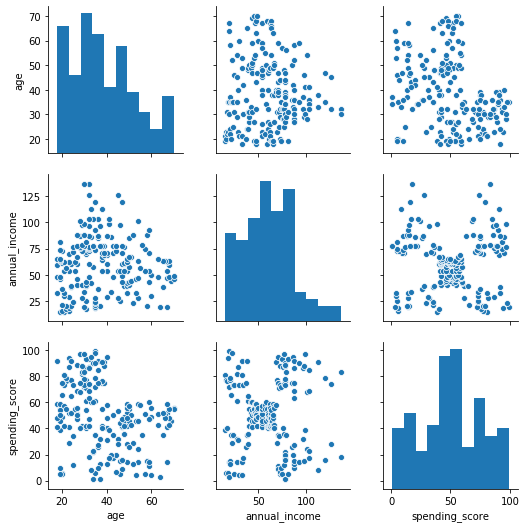

In [67]:
# Graph relationships
sns.pairplot(df)

3. Detect outliers using IQR

In [68]:
upper_age, lower_age = summarize.get_outliers(df.age, 1.5)

In [69]:
lower.value_counts()

0    200
Name: age, dtype: int64

In [70]:
upper_annual_income, lower_annual_income = summarize.get_outliers(df.annual_income, 1.5)

In [71]:
upper_annual_income.value_counts()

0.00    198
4.25      2
Name: annual_income, dtype: int64

In [72]:
lower_annual_income.value_counts()

0    200
Name: annual_income, dtype: int64

In [73]:
upper_spending_score, lower_spending_score = summarize.get_outliers(df.spending_score, 1.5)

In [74]:
upper_spending_score.value_counts()

0    200
Name: spending_score, dtype: int64

In [75]:
lower_spending_score.value_counts()

0    200
Name: spending_score, dtype: int64

4. Split data(train-test-split)

In [138]:
train, test = train_test_split(df, random_state = 42)

4. Encode categorical columns using one hot encoder.

In [139]:
# Look at categorical variable before fit to LabelEncoder.
train.gender.value_counts()

Female    82
Male      68
Name: gender, dtype: int64

In [140]:
int_encoder = LabelEncoder()
int_encoder.fit(train.gender)

LabelEncoder()

In [142]:
# Transform the data to numerical lables, and compare with original value counts.
train['gender_bool'] = int_encoder.transform(train.gender)
train.gender_bool.value_counts()

0    82
1    68
Name: gender_bool, dtype: int64

In [143]:
ohe = OneHotEncoder(sparse = False, categories = 'auto')

In [144]:
gender_ohe = ohe.fit_transform(train[['gender_bool']])
gender_ohe[:,0], gender_ohe[:,1]

(array([1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 1.

In [147]:
pd.DataFrame({'Female': gender_ohe[:,0],
              'Male': gender_ohe[:,1],
              'gender_cat': train.gender})

,Female,Male,gender_cat
customer_id,,,
115,1.00,0.00,Female
174,0.00,1.00,Male
6,1.00,0.00,Female
127,0.00,1.00,Male
118,1.00,0.00,Female
74,1.00,0.00,Female
141,1.00,0.00,Female
99,0.00,1.00,Male
173,0.00,1.00,Male


6. Handle Missing values

***There are no null values in this dataset***

7. Scaling

In [150]:
scaler = MinMaxScaler()
num_vars = list(train.select_dtypes('number').columns)

In [151]:
train[num_vars] = scaler.fit_transform(train[num_vars])

In [153]:
train.describe().drop(columns = ['gender_bool'])

,age,annual_income,spending_score
count,150.00,150.00,150.00
mean,0.40,0.37,0.51
std,0.27,0.22,0.27
min,0.00,0.00,0.00
25%,0.21,0.20,0.35
50%,0.35,0.39,0.49
75%,0.59,0.52,0.73
max,1.00,1.00,1.00
